In [2]:
from helper_functions import walk_through_dir, create_tensorboard_callback, plot_loss_curves

In [3]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [4]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [7]:
import tensorflow as tf

In [10]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

In [11]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


2023-09-12 13:57:19.412790: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-12 13:57:19.445167: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [16]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [17]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [22]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels,"\n")

tf.Tensor(
[[[[ 27.82653     56.05612     34.05612   ]
   [ 26.09694     49.37755     29.260202  ]
   [ 21.647957    38.0051      22.647957  ]
   ...
   [ 11.362303    17.5664      13.000022  ]
   [  5.668372    12.025515     6.9540863 ]
   [  9.290789    17.362217    10.0050745 ]]

  [[ 27.806122    52.571426    33.688774  ]
   [ 29.352041    50.15306     33.362244  ]
   [ 21.92857     35.58673     23.285713  ]
   ...
   [ 11.459224    18.030697    11.173532  ]
   [  3.061275    12.795973     4.923521  ]
   [  8.550817    18.693674    10.550817  ]]

  [[ 34.69898     53.494896    38.77551   ]
   [ 30.392857    44.28061     33.551018  ]
   [  7.7959185   19.459183     9.290816  ]
   ...
   [ 11.683742    18.591915    11.423542  ]
   [  1.8827097   11.086802     2.6837327 ]
   [ 10.351928    22.351929    12.351928  ]]

  ...

  [[ 41.081516    51.652927    55.86722   ]
   [ 12.607098    22.392803    25.035686  ]
   [ 14.9845295   24.004913    26.341654  ]
   ...
   [ 29.30108     34.897

In [41]:
# 1. Create the based model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False
                                                  )
# 2. Freeze the base model (so the underlying pre-trained patterens aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If you are using a model like Resnet50V2 you will need to normalize the inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing the inputs to the base model {x.shape}")

# 6. Average Pool the outputs of the base model (aggregate the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name="output_layer")(x)

# 8. Compile the inputs and outputs with our model

model_0 = tf.keras.Model(inputs, outputs)


# 9. Compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 10. Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=int(0.25 * len(test_data_10_percent)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_feature_extraction")])

Shape after passing the inputs to the base model (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230912-162949
Epoch 1/5
24/24 [==============================] - 19s 633ms/step - loss: 1.9357 - accuracy: 0.3840 - val_loss: 1.3357 - val_accuracy: 0.7237
Epoch 2/5
24/24 [==============================] - 14s 593ms/step - loss: 1.1228 - accuracy: 0.7507 - val_loss: 0.8804 - val_accuracy: 0.8174
Epoch 3/5
24/24 [==============================] - 14s 577ms/step - loss: 0.8095 - accuracy: 0.8187 - val_loss: 0.7178 - val_accuracy: 0.8470
Epoch 4/5
24/24 [==============================] - 14s 570ms/step - loss: 0.6555 - accuracy: 0.8493 - val_loss: 0.6116 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 14s 576ms/step - loss: 0.5569 - accuracy: 0.8747 - val_loss: 0.5635 - val_accuracy: 0.8602


In [42]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 23s 285ms/step - loss: 0.5594 - accuracy: 0.8660


[0.5594392418861389, 0.8659999966621399]

In [43]:
for layer_number, layer in enumerate(base_model.layers):
    print(f"{layer_number} : {layer.name}")

0 : input_7
1 : rescaling_12
2 : normalization_6
3 : rescaling_13
4 : stem_conv_pad
5 : stem_conv
6 : stem_bn
7 : stem_activation
8 : block1a_dwconv
9 : block1a_bn
10 : block1a_activation
11 : block1a_se_squeeze
12 : block1a_se_reshape
13 : block1a_se_reduce
14 : block1a_se_expand
15 : block1a_se_excite
16 : block1a_project_conv
17 : block1a_project_bn
18 : block2a_expand_conv
19 : block2a_expand_bn
20 : block2a_expand_activation
21 : block2a_dwconv_pad
22 : block2a_dwconv
23 : block2a_bn
24 : block2a_activation
25 : block2a_se_squeeze
26 : block2a_se_reshape
27 : block2a_se_reduce
28 : block2a_se_expand
29 : block2a_se_excite
30 : block2a_project_conv
31 : block2a_project_bn
32 : block2b_expand_conv
33 : block2b_expand_bn
34 : block2b_expand_activation
35 : block2b_dwconv
36 : block2b_bn
37 : block2b_activation
38 : block2b_se_squeeze
39 : block2b_se_reshape
40 : block2b_se_reduce
41 : block2b_se_expand
42 : block2b_se_excite
43 : block2b_project_conv
44 : block2b_project_bn
45 : bloc

In [44]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_12 (Rescaling)    (None, None, None, 3)        0         ['input_7[0][0]']             
                                                                                                  
 normalization_6 (Normaliza  (None, None, None, 3)        7         ['rescaling_12[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_13 (Rescaling)    (None, None, None, 3)        0         ['normalization_6

In [45]:
# Summery of Whole Model
model_0.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
________________

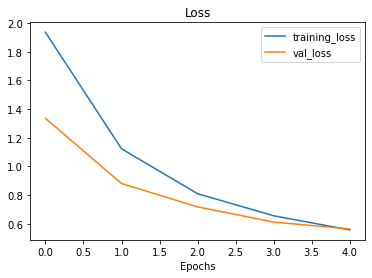

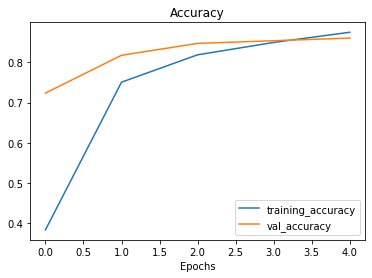

In [46]:
plot_loss_curves(history_0)

In [50]:
## Get a Feature Vector from the Trained Model

input_shape = (1,4,4,3)

input_tensor = tf.random.normal(input_shape)

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(input_tensor.shape,global_average_pooled_tensor.shape)

(1, 4, 4, 3) (1, 3)
